## OLS Method to find Regression Line

### Bivariate Data:

In [1]:
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            import numpy as np
import pandas as pd
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns

In [49]:
data = pd.read_csv('Salary_Data.csv')
data

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [51]:
import warnings
warnings.filterwarnings('ignore')
import statsmodels.api as sm

In [52]:
X = data[['YearsExperience']]
y = data['Salary']

**Without taking X_constant**

In [53]:
lin_reg = sm.OLS(y,X).fit()
lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Salary   R-squared (uncentered):                   0.973
Model:                            OLS   Adj. R-squared (uncentered):              0.972
Method:                 Least Squares   F-statistic:                              1048.
Date:                Tue, 12 Nov 2019   Prob (F-statistic):                    2.56e-24
Time:                        11:04:30   Log-Likelihood:                         -327.28
No. Observations:                  30   AIC:                                      656.6
Df Residuals:                      29   BIC:                                      658.0
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
YearsExperience  1.325e+04    409.401     32.376      0.000    1.24e+04    1.41e+04
==============================================================================
Omnibus:                        0.610   Durbin-Watson:                   0.323
Prob(Omnibus):                  0.737   Jarque-Bera (JB):                0.671
Skew:                          -0.121   Prob(JB):                        0.715
Kurtosis:                       2.308   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Plot of Residuals:**

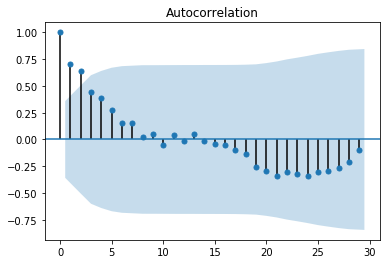

In [54]:
import statsmodels.tsa.api as smt
acf = smt.graphics.plot_acf(lin_reg.resid , lags=29)
acf.show()

**With taking X_constant**

In [55]:
X_constant = sm.add_constant(X)
lin_reg = sm.OLS(y,X_constant).fit()
lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Tue, 12 Nov 2019   Prob (F-statistic):           1.14e-20
Time:                        11:05:15   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [56]:
X_constant.head()

,const,YearsExperience
0,1.0,1.1
1,1.0,1.3
2,1.0,1.5
3,1.0,2.0
4,1.0,2.2


**Plot of Residuals:**

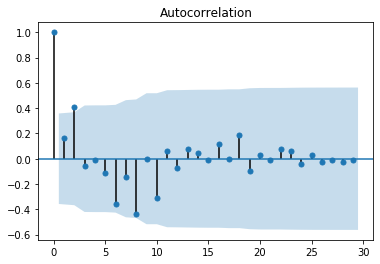

In [48]:
import statsmodels.tsa.api as smt
acf = smt.graphics.plot_acf(lin_reg.resid , lags=29)
acf.show()

### For Multivariate Data:

In [132]:
from sklearn.datasets import load_boston
boston = load_boston()                      #calling an object
df1 = pd.DataFrame(boston.data,columns= boston.feature_names)
df1['Price'] = boston.target
df1.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [133]:
X = df1.iloc[:,:-1]
y = df1['Price']

**Without Taking X_constant**

In [134]:
lin_reg = sm.OLS(y,X).fit()
lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Price   R-squared (uncentered):                   0.959
Model:                            OLS   Adj. R-squared (uncentered):              0.958
Method:                 Least Squares   F-statistic:                              891.3
Date:                Tue, 12 Nov 2019   Prob (F-statistic):                        0.00
Time:                        12:47:35   Log-Likelihood:                         -1523.8
No. Observations:                 506   AIC:                                      3074.
Df Residuals:                     493   BIC:                                      3128.
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
CRIM          -0.0929      0.034     -2.699      0.007      -0.161      -0.025
ZN             0.0487      0.014      3.382      0.001       0.020       0.077
INDUS         -0.0041      0.064     -0.063      0.950      -0.131       0.123
CHAS           2.8540      0.904      3.157      0.002       1.078       4.630
NOX           -2.8684      3.359     -0.854      0.394      -9.468       3.731
RM             5.9281      0.309     19.178      0.000       5.321       6.535
AGE           -0.0073      0.014     -0.526      0.599      -0.034       0.020
DIS           -0.9685      0.196     -4.951      0.000      -1.353      -0.584
RAD            0.1712      0.067      2.564      0.011       0.040       0.302
TAX           -0.0094      0.004     -2.395      0.017      -0.017      -0.002
PTRATIO       -0.3922      0.110     -3.570      0.000      -0.608      -0.176
B              0.0149      0.003      5.528      0.000       0.010       0.020
LSTAT         -0.4163      0.051     -8.197      0.000      -0.516      -0.317
==============================================================================
Omnibus:                      204.082   Durbin-Watson:                   0.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1374.225
Skew:                           1.609   Prob(JB):                    3.90e-299
Kurtosis:                      10.404   Cond. No.                     8.50e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.5e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**Plotting the Autocorrelation of Residuals:**

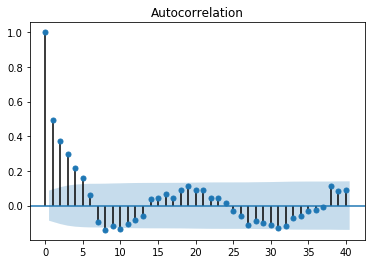

In [92]:
acf = smt.graphics.plot_acf(lin_reg.resid , lags=40)
acf.show()

**With taking X_constant**

In [135]:
X_constant = sm.add_constant(X)
lin_reg = sm.OLS(y,X_constant).fit()
lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Tue, 12 Nov 2019   Prob (F-statistic):          6.72e-135
Time:                        12:47:47   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.4595      5.103      7.144      0.000      26.432      46.487
CRIM          -0.1080      0.033     -3.287      0.001      -0.173      -0.043
ZN             0.0464      0.014      3.382      0.001       0.019       0.073
INDUS          0.0206      0.061      0.334      0.738      -0.100       0.141
CHAS           2.6867      0.862      3.118      0.002       0.994       4.380
NOX          -17.7666      3.820     -4.651      0.000     -25.272     -10.262
RM             3.8099      0.418      9.116      0.000       2.989       4.631
AGE            0.0007      0.013      0.052      0.958      -0.025       0.027
DIS           -1.4756      0.199     -7.398      0.000      -1.867      -1.084
RAD            0.3060      0.066      4.613      0.000       0.176       0.436
TAX           -0.0123      0.004     -3.280      0.001      -0.020      -0.005
PTRATIO       -0.9527      0.131     -7.283      0.000      -1.210      -0.696
B              0.0093      0.003      3.467      0.001       0.004       0.015
LSTAT         -0.5248      0.051    -10.347      0.000      -0.624      -0.425
==============================================================================
Omnibus:                      178.041   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              783.126
Skew:                           1.521   Prob(JB):                    8.84e-171
Kurtosis:                       8.281   Cond. No.                     1.51e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**Plotting the Autocorrelation of Residuals:**

In [22]:
import statsmodels.tsa.api as smt

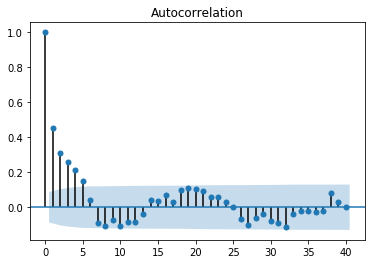

In [62]:
acf = smt.graphics.plot_acf(lin_reg.resid , lags=40)
acf.show()

Here we can say that residuals are cyclic.

### Normality Check:

In [65]:
import scipy.stats as stats

In [67]:
print(stats.jarque_bera(lin_reg.resid))

(783.1262780507673, 0.0)


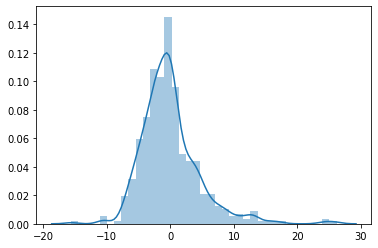

In [70]:
sns.distplot(lin_reg.resid)
plt.show()

- JB-value > 5.99 therefore not normally distributed.
- Here the df1 is having outliers therefore JB-value is so big. And thus the residuals are having skewness.

In [141]:
# removing outliers:

q1 = df1['Price'].quantile(q=0.25)
q3 = df1['Price'].quantile(q=0.75)

IQR = q3-q1

UL = q3 + (1.5 * IQR)

LL = q1 - (1.5 * IQR)

df2 = df1[(df1['Price']>LL) & (df1['Price']<UL)]

In [142]:
X = df2.iloc[:,:-1]
y = df2['Price']

In [143]:
X_constant = sm.add_constant(X)
lin_reg = sm.OLS(y,X_constant).fit()
lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.762
Model:                            OLS   Adj. R-squared:                  0.755
Method:                 Least Squares   F-statistic:                     111.4
Date:                Tue, 12 Nov 2019   Prob (F-statistic):          8.05e-132
Time:                        12:53:59   Log-Likelihood:                -1194.8
No. Observations:                 466   AIC:                             2418.
Df Residuals:                     452   BIC:                             2476.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         39.4712      3.615     10.917      0.000      32.366      46.576
CRIM          -0.1025      0.024     -4.199      0.000      -0.151      -0.055
ZN             0.0384      0.010      3.746      0.000       0.018       0.059
INDUS         -0.0364      0.043     -0.845      0.399      -0.121       0.048
CHAS           1.0673      0.644      1.658      0.098      -0.198       2.332
NOX          -11.9055      2.624     -4.536      0.000     -17.063      -6.748
RM             1.8835      0.337      5.596      0.000       1.222       2.545
AGE           -0.0198      0.009     -2.127      0.034      -0.038      -0.002
DIS           -1.0161      0.141     -7.182      0.000      -1.294      -0.738
RAD            0.2289      0.046      4.998      0.000       0.139       0.319
TAX           -0.0121      0.003     -4.650      0.000      -0.017      -0.007
PTRATIO       -0.6986      0.092     -7.604      0.000      -0.879      -0.518
B              0.0073      0.002      3.979      0.000       0.004       0.011
LSTAT         -0.3769      0.037    -10.283      0.000      -0.449      -0.305
==============================================================================
Omnibus:                       47.427   Durbin-Watson:                   1.226
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               72.848
Skew:                           0.686   Prob(JB):                     1.52e-16
Kurtosis:                       4.367   Cond. No.                     1.52e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.52e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [100]:
print(stats.jarque_bera(lin_reg.resid))

(72.84784027378143, 1.1102230246251565e-16)


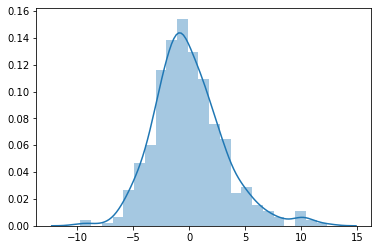

In [101]:
sns.distplot(lin_reg.resid)
plt.show()

- JB-value > 5.99 therefore not normally distributed.

### Linearity Check

In [102]:
lin_reg.resid.mean()       #without outliers

2.2097726605157192e-14

In [116]:
lin_reg.resid.mean()       #with outliers

6.392778269857423e-15

Here mean of residuals are nearly equal to 0 therefore data is linear.

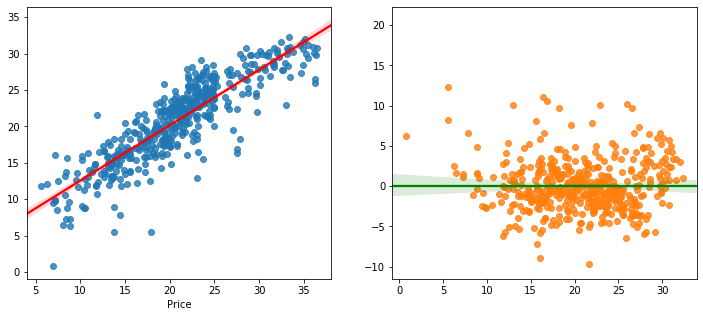

In [125]:
#without outliers
fig,axis = plt.subplots(1,2,figsize=(12,5))

sns.regplot(y,lin_reg.predict(),ax=axis[0],line_kws = {'color':'red'})
sns.regplot(lin_reg.predict(),lin_reg.resid,ax=axis[1],line_kws = {'color':'green'})
plt.show()

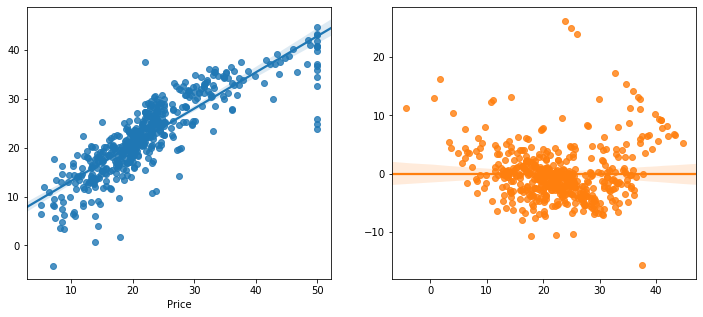

In [115]:
#with outliers:
fig,axis = plt.subplots(1,2,figsize=(12,5))

sns.regplot(y,lin_reg.predict(),ax=axis[0])
sns.regplot(lin_reg.predict(),lin_reg.resid,ax=axis[1])
plt.show()

**Rainbow Test:**

In [129]:
#without outliers:
import statsmodels.api as sm
sm.stats.diagnostic.linear_rainbow(res = lin_reg)

(1.121014183158418, 0.19622520312529085)

- p-value is 0.19 which is greater than 0.05 therefore we accept Null
- Regression is linear

In [136]:
#with outliers:
import statsmodels.api as sm
sm.stats.diagnostic.linear_rainbow(res = lin_reg)

(0.5808507639614257, 0.999988852262534)

- p-value is 0.19 which is greater than 0.05 therefore we accept Null
- Regression is linear

**Probability Plot:**

In [137]:
from scipy.stats import probplot

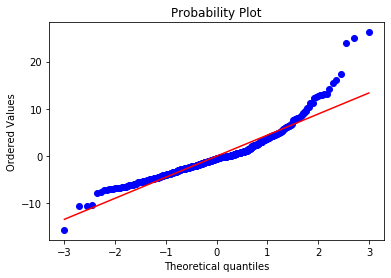

In [140]:
# with ouliers
probplot(lin_reg.resid, plot = plt)
plt.show()

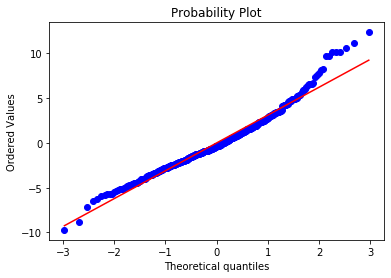

In [145]:
# withot ouliers
probplot(lin_reg.resid, plot = plt)
plt.show()

- from the visuals of the probplot we can certainly say that `data is not linear`, as **_all of the points are not present on the line_**.

**Homoscedasticity Test:**

In [150]:
import statsmodels.stats.api as sms               
test = sms.het_goldfeldquandt(lin_reg.resid, lin_reg.model.exog)          #exog is for input and endog is for output       
test

(1.824405031916362, 5.14398904034541e-06, 'increasing')

Since the P-value=5.14398904034541e-06 < 5%, hence we reject null thaerefore residual variance is not constancr across regression.

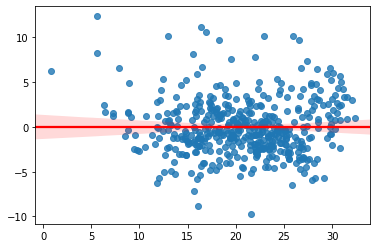

In [151]:
sns.regplot(lin_reg.predict(),lin_reg.resid,line_kws = {'color':'red'})
plt.show()

we can say that resuduals are not evenly distributed.

__Multi-Colinearity:__

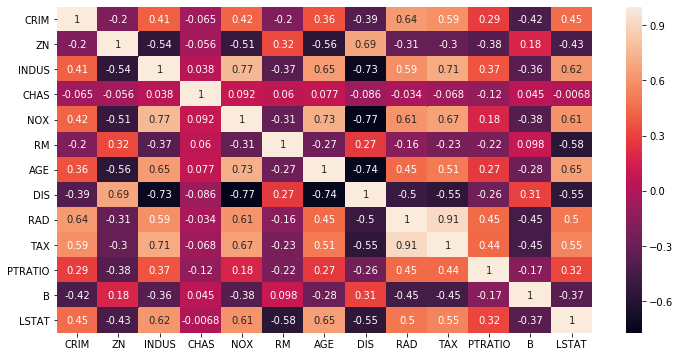

In [169]:
plt.subplots(figsize=(12,6))

sns.heatmap(X.corr(),annot=True)
plt.show()

In [168]:
#Variance Inflation Factor (VIF):
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [170]:
X_constant.columns

Index(['const', 'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS',
       'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

In [172]:
variance_inflation_factor(X_constant.values,1)                 # we never use 0 for VIF because feature 0 is const whose VIF is of no use.

1.8506293797797613

In [192]:
vif = [variance_inflation_factor(X_constant.values,i) for i in range(X_constant.shape[1])]
pd.DataFrame({'vif':vif[1:]},index=X.columns).T

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
vif,1.850629,2.357394,3.90505,1.070815,4.335213,1.718213,3.119383,4.127129,7.402633,8.721134,1.640866,1.375674,2.949962


NOTE: This VIF column has to be built with the help of X_constant and not the X_values, because we built our model by adding constants.

- Here RAD and TAX is having VIF more than 5 therefore it is of no use.
- after ignoring RAD and TAX VIF changes a lot therefore we have to again check.

#### Checking Under-fitting or Over-fitting using R^2 score:

In [245]:
mtcars = pd.read_csv('mtcars.csv')

In [246]:
X = mtcars.iloc[:,2:]
y = mtcars['mpg']

lr.fit(X,y)

print("R-score:",lr.score(X,y))


print("slope:",lr.coef_)
print("intercept:",lr.intercept_)

R-score: 0.8690157644777647
slope: [-0.11144048  0.01333524 -0.02148212  0.78711097 -3.71530393  0.82104075
  0.31776281  2.52022689  0.65541302 -0.19941925]
intercept: 12.30337415599627


In [247]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30,random_state = 1)

print("slope:",lr.coef_)
print("\nintercept:",lr.intercept_)

print("\nR-score_test:",lr.score(X_test,y_test))
print("R-score_train:",lr.score(X_train,y_train))


slope: [-0.11144048  0.01333524 -0.02148212  0.78711097 -3.71530393  0.82104075
  0.31776281  2.52022689  0.65541302 -0.19941925]

intercept: 12.30337415599627

R-score_test: 0.9050220508437036
R-score_train: 0.777314740105476


In [248]:
X_constant = sm.add_constant(X)
lin_reg = sm.OLS(y,X_constant).fit()
lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.869
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     13.93
Date:                Tue, 12 Nov 2019   Prob (F-statistic):           3.79e-07
Time:                        16:42:45   Log-Likelihood:                -69.855
No. Observations:                  32   AIC:                             161.7
Df Residuals:                      21   BIC:                             177.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.3034     18.718      0.657      0.518     -26.623      51.229
cyl           -0.1114      1.045     -0.107      0.916      -2.285       2.062
disp           0.0133      0.018      0.747      0.463      -0.024       0.050
hp            -0.0215      0.022     -0.987      0.335      -0.067       0.024
drat           0.7871      1.635      0.481      0.635      -2.614       4.188
wt            -3.7153      1.894     -1.961      0.063      -7.655       0.224
qsec           0.8210      0.731      1.123      0.274      -0.699       2.341
vs             0.3178      2.105      0.151      0.881      -4.059       4.694
am             2.5202      2.057      1.225      0.234      -1.757       6.797
gear           0.6554      1.493      0.439      0.665      -2.450       3.761
carb          -0.1994      0.829     -0.241      0.812      -1.923       1.524
==============================================================================
Omnibus:                        1.907   Durbin-Watson:                   1.861
Prob(Omnibus):                  0.385   Jarque-Bera (JB):                1.747
Skew:                           0.521   Prob(JB):                        0.418
Kurtosis:                       2.526   Cond. No.                     1.22e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.22e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [249]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = [variance_inflation_factor(X_constant.values,i) for i in range(X_constant.shape[1])]
pd.DataFrame({'vif':vif[1:]},index=X.columns).T

,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
vif,15.373833,21.620241,9.832037,3.37462,15.164887,7.527958,4.965873,4.648487,5.357452,7.908747


In [258]:
X = mtcars.drop(['cyl','disp','wt'],axis=1)

X = X.iloc[:,2:]
y = mtcars['mpg']

lr.fit(X,y)

print("R-score:",lr.score(X,y))


print("slope:",lr.coef_)
print("intercept:",lr.intercept_)


R-score: 0.8358167795252849
slope: [-2.69362777e-02  1.47318997e+00  2.16595599e-03  1.51348337e+00
  3.42953797e+00  1.48642921e+00 -1.13056798e+00]
intercept: 14.347876811394169


In [259]:
vif = [variance_inflation_factor(X_constant.values,i) for i in range(X_constant.shape[1])]
pd.DataFrame({'vif':vif[1:]},index=X.columns).T

,hp,drat,qsec,vs,am,gear,carb
vif,5.075011,3.020934,4.713681,3.791803,4.052249,4.372869,3.641534


In [260]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30,random_state = 1)

print("slope:",lr.coef_)
print("\nintercept:",lr.intercept_)

print("\nR-score_test:",lr.score(X_test,y_test))
print("R-score_train:",lr.score(X_train,y_train))
print("R-train-R-test", lr.score(X_train,y_train) - lr.score(X_test,y_test))

slope: [-2.69362777e-02  1.47318997e+00  2.16595599e-03  1.51348337e+00
  3.42953797e+00  1.48642921e+00 -1.13056798e+00]

intercept: 14.347876811394169

R-score_test: 0.880527067187039
R-score_train: 0.7217473139738335
R-train-R-test -0.15877975321320548


In [261]:
X_constant = sm.add_constant(X)
lin_reg = sm.OLS(y,X_constant).fit()
lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.788
Method:                 Least Squares   F-statistic:                     17.45
Date:                Tue, 12 Nov 2019   Prob (F-statistic):           5.35e-08
Time:                        16:43:21   Log-Likelihood:                -73.469
No. Observations:                  32   AIC:                             162.9
Df Residuals:                      24   BIC:                             174.7
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         14.3479     13.934      1.030      0.313     -14.410      43.106
hp            -0.0269      0.016     -1.645      0.113      -0.061       0.007
drat           1.4732      1.620      0.909      0.372      -1.871       4.818
qsec           0.0022      0.606      0.004      0.997      -1.248       1.252
vs             1.5135      1.926      0.786      0.440      -2.461       5.488
am             3.4295      2.011      1.705      0.101      -0.721       7.580
gear           1.4864      1.413      1.052      0.303      -1.430       4.402
carb          -1.1306      0.589     -1.920      0.067      -2.346       0.085
==============================================================================
Omnibus:                        0.076   Durbin-Watson:                   1.989
Prob(Omnibus):                  0.963   Jarque-Bera (JB):                0.293
Skew:                          -0.009   Prob(JB):                        0.864
Kurtosis:                       2.531   Cond. No.                     4.63e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.63e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [262]:
X = mtcars.drop(['disp'],axis=1)

X = X.iloc[:,2:]
y = mtcars['mpg']

lr.fit(X,y)

print("R-score:",lr.score(X,y))


print("slope:",lr.coef_)
print("intercept:",lr.intercept_)


R-score: 0.8655375202824598
slope: [ 0.09626514 -0.0129498   0.92863866 -2.62694278  0.66523397  0.16035155
  2.47881882  0.74299607 -0.61685611]
intercept: 12.550524010059803


In [263]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30,random_state = 1)

print("slope:",lr.coef_)
print("\nintercept:",lr.intercept_)

print("\nR-score_test:",lr.score(X_test,y_test))
print("R-score_train:",lr.score(X_train,y_train))
print("R-train-R-test", lr.score(X_train,y_train) - lr.score(X_test,y_test))

slope: [ 0.09626514 -0.0129498   0.92863866 -2.62694278  0.66523397  0.16035155
  2.47881882  0.74299607 -0.61685611]

intercept: 12.550524010059803

R-score_test: 0.9055057258887071
R-score_train: 0.7651779429452826
R-train-R-test -0.14032778294342452


__Transformation__

In [288]:
df5 = mtcars.drop(['model'],axis=1)
df5 = df5.transform(lambda x:x**0.5)

X = df5.iloc[:,2:]
y = df5['mpg']

In [290]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30,random_state = 1)

lr.fit(X_train,y_train)

print("slope:",lr.coef_)
print("\nintercept:",lr.intercept_)

print("\nR-score_test:",lr.score(X_test,y_test))
print("R-score_train:",lr.score(X_train,y_train))
print("R-train-R-test", lr.score(X_train,y_train) - lr.score(X_test,y_test))

slope: [ 0.0219191  -0.07379191  0.52225929 -0.93073176  0.02899744 -0.15562786
 -0.15969278  1.03553307 -0.3162431 ]

intercept: 4.180828353580391

R-score_test: 0.7785394435440763
R-score_train: 0.9158190001146417
R-train-R-test 0.13727955657056534


In [292]:
df5 = mtcars.drop(['model'],axis=1)
df5 = df5.transform(lambda x:x**0.5)

X = df5.iloc[:,2:]
y = df5['mpg']

In [293]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30,random_state = 1)

lr.fit(X_train,y_train)

print("slope:",lr.coef_)
print("\nintercept:",lr.intercept_)

print("\nR-score_test:",lr.score(X_test,y_test))
print("R-score_train:",lr.score(X_train,y_train))
print("R-train-R-test", lr.score(X_train,y_train) - lr.score(X_test,y_test))

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').